<a href="https://colab.research.google.com/github/girinath18/aadhaar-cardDetection/blob/mobile/DL_Project_3_Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [4]:
# installing the Kaggle library
!pip install kaggle

In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [6]:
# Kaggle api
!kaggle datasets download -d girinathrs211555/aaadhaar

Dataset URL: https://www.kaggle.com/datasets/girinathrs211555/aaadhaar
License(s): unknown
aaadhaar.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls

 aaadhaar.zip   AC	 Capture.PNG	  kaggle.json	 resized       train
 aadhaar.zip    Ace.h5	'image resized'  'OIP (1).jpg'	 sample_data


In [8]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/aaadhaar.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [2]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/wasted/train/Aadhaar_card'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  27000


Printing the name of images

In [3]:
file_names = os.listdir('/content/wasted/train/Aadhaar_card/')
print(file_names)

['cats (2503).jpeg', 'cats (1514).jpg', 'dogs (1902).jpg', 'dogs (4514).jpg', 'dogs (4095).jpg', 'cats (1021).jpeg', 'cats (6524).jpeg', 'cats (4278).jpeg', 'cats (5497).jpeg', 'cats (7627).jpeg', 'dogs (3127).png', 'cats (3329).jpeg', 'dogs (1474).jpg', 'dogs (6158).png', 'dogs (4143).png', 'dogs (3802).jpg', 'cats (2602).jpg', 'cats (1580).jpeg', 'dogs (2720).jpg', 'dogs (4904).png', 'dogs (334).jpeg', 'cats (7211).jpeg', 'dogs (979).jpeg', 'dogs (374).jpg', 'cats (2363).jpg', 'cats (7240).jpeg', 'dogs (185).jpg', 'dogs (4576).png', 'cats (3407).jpeg', 'dogs (717).png', 'dogs (3029).jpg', 'cats (4248).jpg', 'cats (3936).jpg', 'cats (1243).jpeg', 'cats (5365).jpeg', 'dogs (680).png', 'cats (736).jpeg', 'cats (8388).jpeg', 'dogs (714).jpg', 'dogs (240).png', 'cats (8535).jpeg', 'cats (1818).jpg', 'dogs (6370).png', 'cats (1579).jpg', 'cats (576).jpg', 'cats (5845).jpeg', 'cats (5700).jpeg', 'dogs (3387).jpg', 'dogs (4051).jpg', 'dogs (3091).png', 'dogs (4922).jpg', 'dogs (5895).png', '

Importing the Dependencies

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

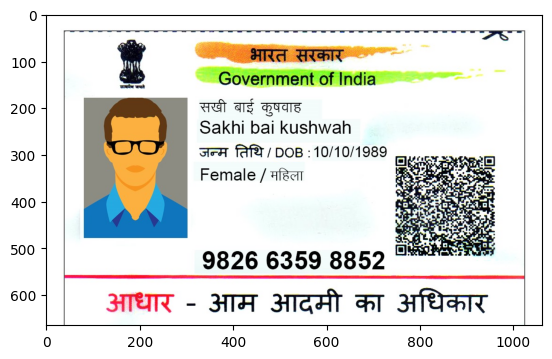

In [12]:
# display dog image
img = mpimg.imread('/content/train/Aadhaar_card/dogs (4095).jpg')
imgplt = plt.imshow(img)
plt.show()

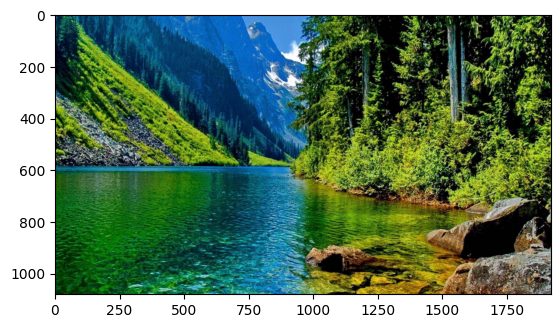

In [13]:
# display cat image
img = mpimg.imread('/content/train/Aadhaar_card/cats (1514).jpg')
imgplt = plt.imshow(img)
plt.show()

In [14]:
file_names = os.listdir('/content/train/Aadhaar_card/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
cat
dog
dog
dog


In [15]:
file_names = os.listdir('/content/train/Aadhaar_card/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 13500
Number of cat images = 13500


Resizing all the images

In [19]:
#creating a directory for resized images
os.mkdir('/content/hunered')

In [34]:
original_folder = '/content/wasted/train/Aadhaar_card/'
resized_folder = '/content/hunered/'

for i in range(5784):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

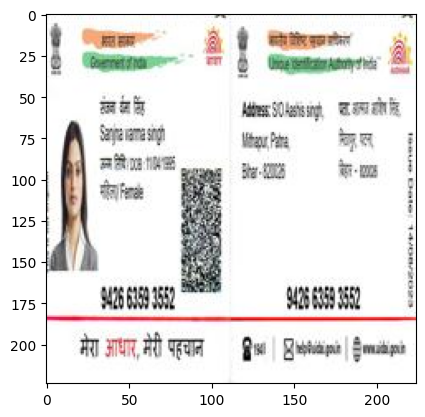

In [35]:
# display resized dog image
img = mpimg.imread('/content/hunered/dogs (1902).jpg')
imgplt = plt.imshow(img)
plt.show()

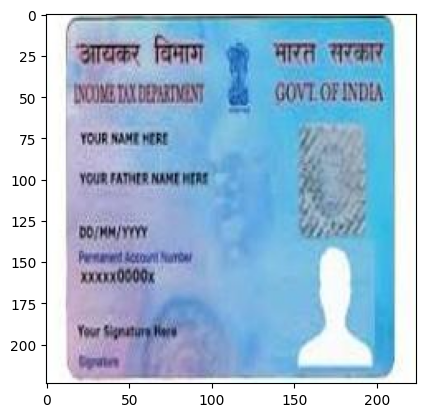

In [36]:
# display resized cat image
img = mpimg.imread('/content/hunered/cats (1008).jpeg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [48]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/hunered/')


labels = []

for i in range(5784):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [49]:
print(filenames[0:5])
print(len(filenames))

['cats (2503).jpeg', 'cats (1514).jpg', 'dogs (1902).jpg', 'dogs (4514).jpg', 'dogs (4095).jpg']
9342


In [50]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 1]
5784


In [51]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[2948 2836]


Converting all the resized images to numpy arrays

In [52]:
import cv2
import glob

In [53]:
image_directory = '/content/hunered/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [54]:
print(dog_cat_images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [55]:
type(dog_cat_images)

numpy.ndarray

In [58]:
print(dog_cat_images.shape)

(5784, 224, 224, 3)


In [57]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(5784, 224, 224, 3) (4627, 224, 224, 3) (1157, 224, 224, 3)


1600 --> training images

400 --> test images

In [61]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [62]:
print(X_train_scaled)

[[[[0.90588235 0.90588235 0.90588235]
   [0.90588235 0.90588235 0.90588235]
   [0.90980392 0.90980392 0.90980392]
   ...
   [0.91764706 0.91764706 0.91764706]
   [0.91764706 0.91764706 0.91764706]
   [0.91764706 0.91764706 0.91764706]]

  [[0.92941176 0.92941176 0.92941176]
   [0.92941176 0.92941176 0.92941176]
   [0.9254902  0.9254902  0.9254902 ]
   ...
   [0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]]

  [[0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]
   [0.91764706 0.91764706 0.91764706]
   ...
   [0.90980392 0.90980392 0.90980392]
   [0.90980392 0.90980392 0.90980392]
   [0.90980392 0.90980392 0.90980392]]

  ...

  [[0.90980392 0.90980392 0.90980392]
   [0.90980392 0.90980392 0.90980392]
   [0.90980392 0.90980392 0.90980392]
   ...
   [0.90980392 0.90980392 0.90980392]
   [0.90980392 0.90980392 0.90980392]
   [0.90980392 0.90980392 0.90980392]]

  [[0.90588235 0.90588235 0.90588235]
   [0.9

**Building the Neural Network**

In [67]:
import tensorflow as tf
import tensorflow_hub as hub

In [68]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [69]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [70]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=15)

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
'''
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

'''

In [ ]:
# prompt: give me the command to save the .h5 file

model.save('Ace.h5')
